In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")


# Function to take in str elements of a column of numbers (e.g. 20,000), remove commas and return as floats (e.g. 20000.0)
def clean_column(col_obj:str) -> float:
    if type(col_obj) != str:
        return col_obj
    else:
        return float(col_obj.replace(',','')) # removes comma and converts to float
    
ny_emissions = pd.read_csv('data/AnnualEmissions_NY.csv')

# Change column names of dataframe: replace spaces with underscores (e.g. Source_Name) and remove units
new_col_names = ['Year', 'Source_Name', 'ORIS_Code', 'Unit_ID', 'State',
       'State_Identifier', 'Control_Period', 'Op_Time', 'Op_Hours',
       'CO2_Mass', 'Heat_Input',
       'Eligible_Biomass',
       'Eligible_CHP_Thermal_Output', 'Reporting_Status']
ny_emissions.columns = new_col_names

# Clean all quantative columns of the dataframe: remove commas, cast as floats 
features = ['CO2_Mass', 'Op_Time', 'Op_Hours', 'Heat_Input']
for feature in features:
    ny_emissions[feature] = ny_emissions[feature].apply(clean_column)

Text(0, 0.5, 'CO2 Mass (tons)')

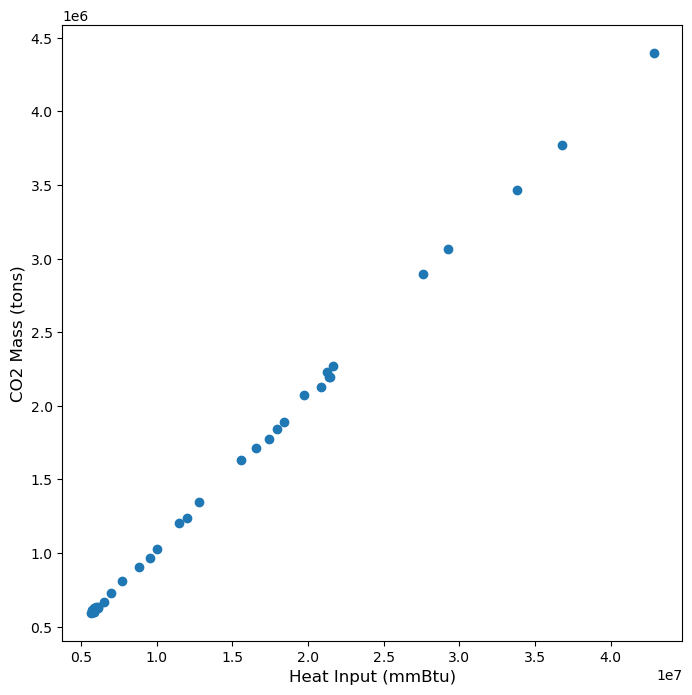

In [5]:
window=2000000
high_df = ny_emissions[(ny_emissions['CO2_Mass']*10 > ny_emissions['Heat_Input'] - window) & (ny_emissions['CO2_Mass']*10 < ny_emissions['Heat_Input'] + window)]
high_df = high_df[high_df['Heat_Input'] > 5.5*10**6]

plt.figure(figsize=(8,8))

plt.scatter(data=high_df, x='Heat_Input', y='CO2_Mass')

plt.xlabel('Heat Input (mmBtu)', fontsize=12)
plt.ylabel('CO2 Mass (tons)', fontsize=12)


Text(0, 0.5, 'CO2 Mass (tons)')

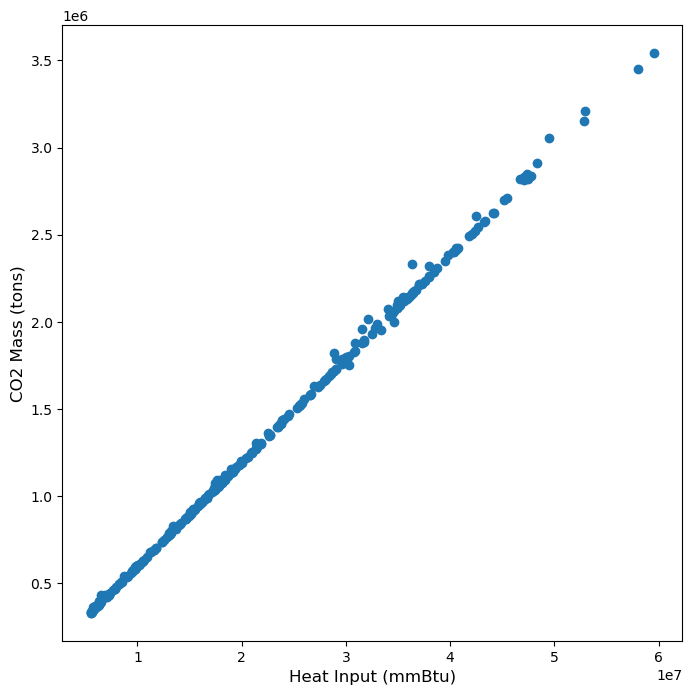

In [6]:
low_df = ny_emissions[~ny_emissions.index.isin(high_df.index)]
low_df = low_df[low_df['Heat_Input'] > 5.5*10**6]

plt.figure(figsize=(8,8))

plt.scatter(data=low_df, x='Heat_Input', y='CO2_Mass')

plt.xlabel('Heat Input (mmBtu)', fontsize=12)
plt.ylabel('CO2 Mass (tons)', fontsize=12)


In [7]:
high_sources = high_df['Source_Name'].unique()
low_sources = low_df['Source_Name'].unique()

print(np.isin(high_sources, low_sources))

[False  True False False False False False]


In [8]:
print("High Sources:", high_sources)
print()
print("Low Sources:", low_sources)

High Sources: ['Danskammer Generating Station' 'Greenidge Generation LLC'
 'Cayuga Operating Company, LLC' 'Huntley Power' 'NRG Dunkirk Power'
 'Somerset Operating Company  (Kintigh)' 'Black River Generation, LLC']

Low Sources: ['Arthur Kill' 'Charles Poletti' 'East River'
 'Ravenswood Generating Station' 'E F Barrett' 'Northport'
 'Port Jefferson Energy Center' 'Greenidge Generation LLC'
 'Bethlehem Energy Center (Albany)' 'Bowline Generating Station'
 'Richard M Flynn (Holtsville)' 'Astoria Generating Station'
 'Selkirk Cogen Partners' 'Bethpage Energy Center'
 'Indeck-Corinth Energy Center' 'KIAC Cogeneration' 'Independence'
 'Saranac Power Partners, LP' 'Brooklyn Navy Yard Cogeneration'
 'Astoria Energy' 'Athens Generating Company' 'Poletti 500 MW CC'
 'Caithness Long Island Energy Center' 'Empire Generating Co, LLC'
 'Valley Energy Center' 'Cricket Valley Energy Center']


In [9]:
accounted_sources = np.concatenate((high_sources, low_sources), axis=0)

missing_sources = np.array([source for source in ny_emissions['Source_Name'].unique() if source not in accounted_sources])
missing_sources

array(['Gowanus Generating Station', 'Hudson Avenue',
       'Narrows Generating Station', '74th Street', 'Far Rockaway',
       'Glenwood', 'West Babylon Facility', 'GMMM Westover',
       'Oswego Harbor Power', 'Hillburn', 'Shoemaker',
       'Freeport Power Plant No. 2', 'S A Carlson',
       'Wading River Facility', 'Glenwood Landing Energy Center',
       'Vernon Boulevard', '23rd and 3rd', 'Brentwood', 'Hell Gate',
       'Harlem River Yard', 'North 1st', 'Roseton Generating LLC',
       'Holtsville Facility', 'Pouch Terminal', 'Castleton Power, LLC',
       'Beaver Falls, LLC', 'Allegany Station No. 133', 'Carthage Energy',
       'Syracuse, LLC', 'AG - Energy', 'Niagara Generation, LLC',
       'Indeck-Silver Springs Energy Center',
       'Indeck-Oswego Energy Center', 'Indeck-Yerkes Energy Center',
       'Covanta Niagara', 'Syracuse Energy Corporation',
       'Sterling Power Plant', 'Carr Street Generating Station',
       'Nassau Energy Corporation', 'Rensselaer Cogen', 'L

In [10]:
facilities_df = pd.read_csv('data/facility-attributes-8fc1652b-510e-4af9-a31b-9911898ebb75.csv')
facilities_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4742 entries, 0 to 4741
Data columns (total 30 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   State                                             4742 non-null   object 
 1   Facility Name                                     4742 non-null   object 
 2   Facility ID                                       4742 non-null   int64  
 3   Unit ID                                           4742 non-null   object 
 4   Associated Stacks                                 2043 non-null   object 
 5   Year                                              4742 non-null   int64  
 6   Program Code                                      4721 non-null   object 
 7   Primary Rep Info                                  4728 non-null   object 
 8   EPA Region                                        4742 non-null   int64  
 9   NERC Region        

In [11]:
# high_facilities_df = facilities_df[facilities_df['Facility Name'].isin(high_sources)]
# high_primary_fuel = high_facilities_df['Primary Fuel Type'].unique()
# high_secondary_fuel = high_facilities_df['Secondary Fuel Type'].unique()

# print("High Primary:", high_primary_fuel)
# print("High Secondary:", high_secondary_fuel)
# print()

# low_facilities_df = facilities_df[facilities_df['Facility Name'].isin(low_sources)]
# low_primary_fuel = low_facilities_df['Primary Fuel Type'].unique()
# low_secondary_fuel = low_facilities_df['Secondary Fuel Type'].unique()

# print("Low Primary:", low_primary_fuel)
# print("Low Secondary:", low_secondary_fuel)


col_name = 'Primary Fuel Type'
print('High '+col_name+':', facilities_df[facilities_df['Facility Name'].isin(high_sources)][col_name].unique())
print('Low '+col_name+':', facilities_df[facilities_df['Facility Name'].isin(low_sources)][col_name].unique())

print()

col_name = 'Secondary Fuel Type'
print('High '+col_name+':', facilities_df[facilities_df['Facility Name'].isin(high_sources)][col_name].unique())
print('Low '+col_name+':', facilities_df[facilities_df['Facility Name'].isin(low_sources)][col_name].unique())

High Primary Fuel Type: ['Residual Oil' 'Residual Oil, Pipeline Natural Gas'
 'Pipeline Natural Gas' 'Coal' 'Coal, Pipeline Natural Gas' 'Coal, Wood'
 'Wood']
Low Primary Fuel Type: ['Pipeline Natural Gas' 'Diesel Oil' 'Residual Oil'
 'Residual Oil, Pipeline Natural Gas' 'Coal' 'Coal, Pipeline Natural Gas'
 'Other Oil' 'Natural Gas']

High Secondary Fuel Type: ['Pipeline Natural Gas' 'Residual Oil, Pipeline Natural Gas'
 'Residual Oil' nan 'Residual Oil, Wood' 'Wood'
 'Other Solid Fuel, Petroleum Coke, Tire Derived Fuel, Wood'
 'Other Solid Fuel, Petroleum Coke, Tire Derived Fuel']
Low Secondary Fuel Type: [nan 'Pipeline Natural Gas' 'Residual Oil, Pipeline Natural Gas'
 'Residual Oil' 'Diesel Oil' 'Residual Oil, Wood' 'Wood']


In [12]:
col_name = 'Max Hourly HI Rate (mmBtu/hr)'
print('High '+col_name+':', facilities_df[facilities_df['Facility Name'].isin(high_sources)][col_name].unique())
print('Low '+col_name+':', facilities_df[facilities_df['Facility Name'].isin(low_sources)][col_name].unique())

High Max Hourly HI Rate (mmBtu/hr): [ 709.  1654.   904.   955.7 1100.  1337.  3260.  2419.   515.  1345.
 1117.  1280.  1980.  2072.  1839.  2275.  2500.   895.   975.   950.
 1834.  2250.  6280.   249.   266.   288. ]
Low Max Hourly HI Rate (mmBtu/hr): [3717. 5502.  235. 8266. 3165. 1930. 1982. 4204. 4171. 9379.  424.  243.
  240.  255.  524. 2156. 2300. 2000. 2100.  276.  270. 3900. 3600. 4000.
 3800. 4100.  266. 1950. 2052. 2075. 1998.  480.  492.  457.  460.  478.
  515. 1345. 1117. 1280. 2450. 7000. 7600. 1325. 3984. 4074. 4094. 1215.
 1259. 1206. 1250.  416.  545.  730. 1279.  718. 2133. 2162. 1676. 1051.
 1447. 1503. 1600. 2325. 2342. 2550. 2350. 2390. 2191. 2445. 2800. 3100.
 2080. 2041. 2650. 2280. 2750. 2734.]


(array([653., 217., 335.,  75., 159.,  15.,   0.,  15.,  17.,  15.]),
 array([ 235. , 1149.4, 2063.8, 2978.2, 3892.6, 4807. , 5721.4, 6635.8,
        7550.2, 8464.6, 9379. ]),
 <BarContainer object of 10 artists>)

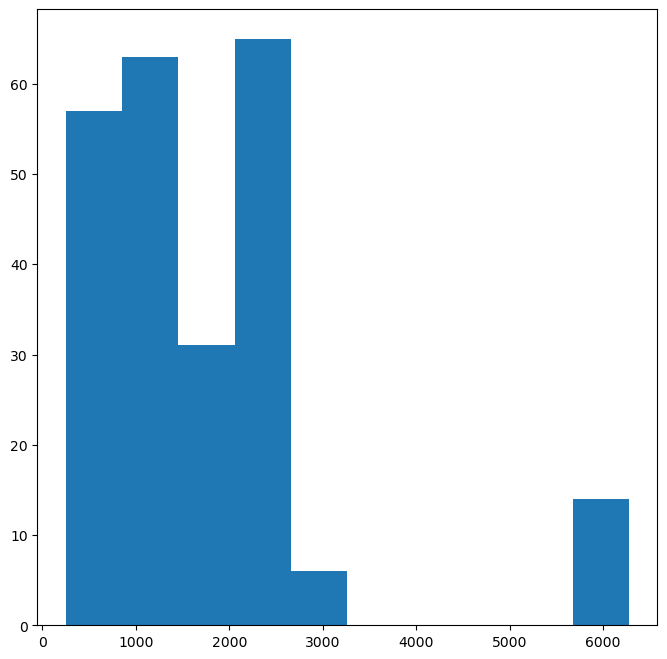

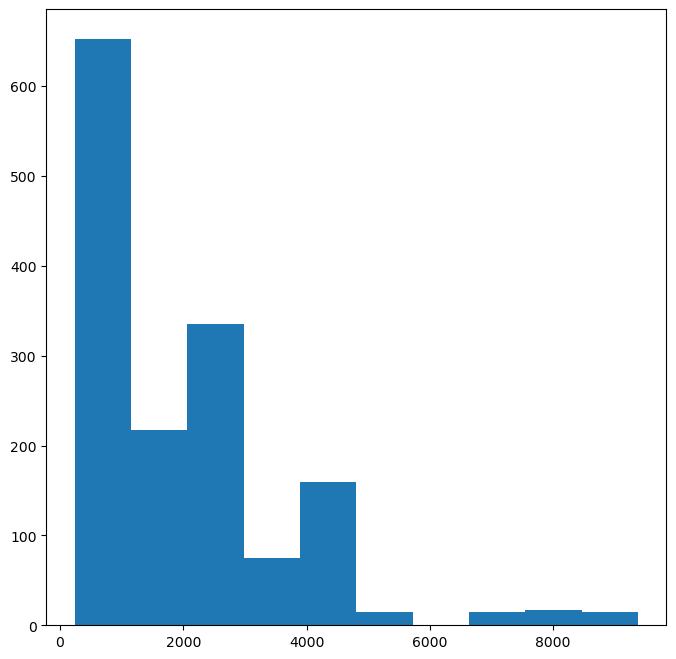

In [13]:
high_facilities_df = facilities_df[facilities_df['Facility Name'].isin(high_sources)]
low_facilities_df = facilities_df[facilities_df['Facility Name'].isin(low_sources)]

plt.figure(figsize=(8,8))
plt.hist(high_facilities_df['Max Hourly HI Rate (mmBtu/hr)'])

plt.figure(figsize=(8,8))
plt.hist(low_facilities_df['Max Hourly HI Rate (mmBtu/hr)'])
